In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime

#Import data from John Hopkins CSSE 
df = pd.read_csv('time_series_covid19_confirmed_US.csv')

df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,77,82,84,93,112,113,121,121,128,130
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,6,6,6,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,286,316,316,452,475,513,573,620,683,725
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,30,30,37,40,42,43,43,45,45,50


In [15]:
#Reformat (lat/long could be useful for regional grouping/visualization)
df.drop(['Country_Region','Lat','Long_'], axis=1,inplace=True)
df1 = df.iloc[:,6:]
df1.tail()
#some states, one cruise ship

,Province_State,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
3248,Washington,"Unassigned, Washington, US",0,0,0,0,0,0,0,0,...,303,344,501,483,533,648,677,915,838,908
3249,West Virginia,"Unassigned, West Virginia, US",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,0,0
3250,Wisconsin,"Unassigned, Wisconsin, US",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3251,Wyoming,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3252,Grand Princess,"Grand Princess, US",0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103


In [3]:
#make list of states
state = df1['Province_State']
state.drop_duplicates(inplace=True)

#how many states are in the data
print(str(state.shape[0])+' states/territories')

#List of all 'States'
#for col in state: 
#    print(col) 

#50 states + 8 territories 
    #1) Diamond Princess
    #2) Grand Princess
    #3) D.C.
    #4) Samoa
    #5) Guam
    #6) Puerto Rico
    #7) Virgin Islands
    #8) North Marina Islands

58 states/territories in data


In [4]:
#function to form state_df
def state_func(state):
    state_len = len(state)
    dc1 = df1.loc[df['Province_State'] == state]

    dc1.drop(['Province_State'], axis=1,inplace=True)
    dc1 = dc1.T

    new_header = dc1.iloc[0] #grab the first row for the header
    dc = dc1[1:] #take the data less the header row
    dc.columns = new_header

    dc.columns = pd.Index(map(lambda x : str(x)[:-(state_len+6)], dc.columns))
    dc.columns.name = 'Date'

    sum = dc.sum(axis=1)
    dc['Total'] = sum
    
    return dc

In [5]:
#function to plot/compare states
def fig(state1,state2='',state3=''):
    plt.figure(figsize=(15,10))
    #-------
    df1 = state_func(state1)
    df2 = state_func(state2)
    df3 = state_func(state3)
    
    plt.plot_date(df1.index,df1.Total,ls='-',label=state1)
    if state2!='':
        plt.plot_date(df2.index,df2.Total,ls='-',label=state2)
        if state3!='':
            plt.plot_date(df3.index,df3.Total,ls='-',label=state3)
    #-------
    ax=plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

    plt.title('Total Cases: '+str(state1))
    plt.ylabel('Positive Cases')
    plt.xlabel('Date')

    plt.legend() 
    plt.xticks(rotation='vertical')

In [6]:
#plot daily cases
def plot_diff(state):
    #---------------------------------
    diff_st = state_func(state).diff()

    plt.figure(figsize=(15,10))

    #diff
    plt.bar(diff_st.index,diff_st.Total,ls='-',label=state,color='indianred')
       
    ax=plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

    plt.title('Daily Cases: '+str(state))
    plt.ylabel('Positive Cases')
    plt.xlabel('Date')

    plt.legend() 
    plt.xticks(rotation='vertical')

/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will r

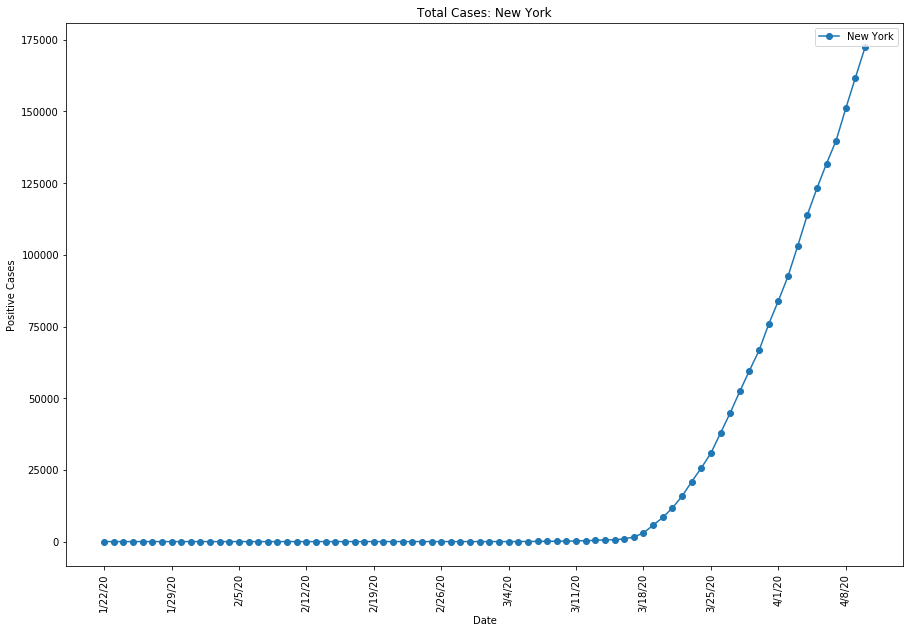

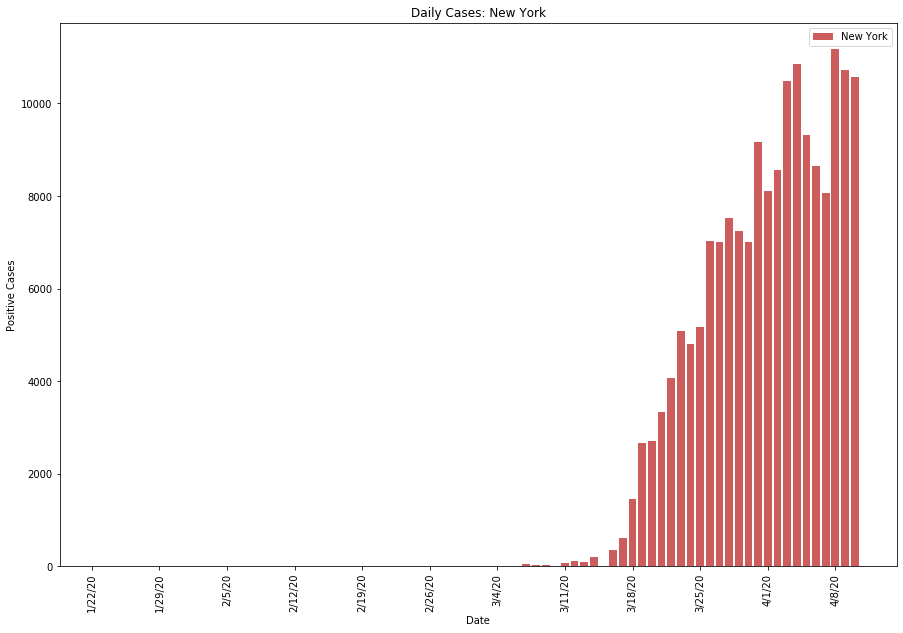

In [7]:
state = 'New York'

fig(state)
plot_diff(state)

/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


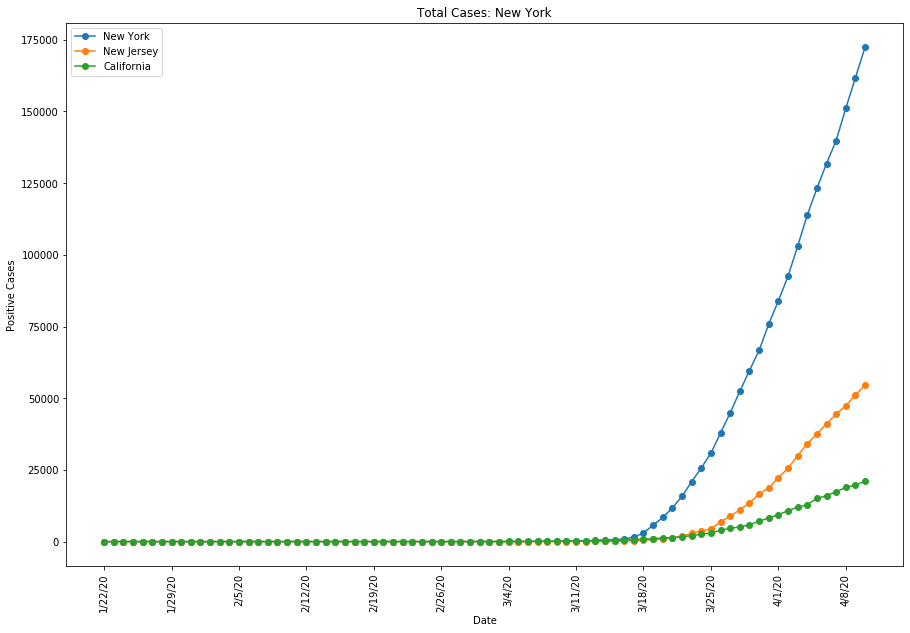

In [9]:
#TD: What are the top states? (A: NY, NJ, Mass, Michigan, California, Penn, Ill, Louis, Flo)
#Make seperate comparative function
fig('New York','New Jersey','California')

In [10]:
#Trim plot star 3/02
#NYS most recent 4/10: 1,498

In [11]:
#Explore NY data/See 'NYS API' for more

#for col in df_ny: 
#    print(col) 

df_ny = state_func('New York')
df_ny

#Bronx, Queens, Brooklen (Kings County), Staten Island (Richmond County) are 0
#Manhattan is missing
#All boroughs are collected into New York City I believe

/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Date,Albany,Allegany,Bronx,Broome,Cattaraugus,Cayuga,Chautauqua,Chemung,Chenango,Clinton,...,Ulster,Warren,Washington,Wayne,Westchester,Wyoming,Yates,Out of NY,Unassigned,Total
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/6/20,319,17,0,76,12,11,18,47,46,36,...,382,26,19,34,14294,23,1,0,0,131815.0
4/7/20,333,17,0,86,13,14,18,49,51,37,...,398,31,19,35,14294,23,1,0,0,139875.0
4/8/20,342,21,0,93,15,14,18,55,53,39,...,462,33,20,39,15887,27,1,0,0,151061.0
4/9/20,379,22,0,105,17,16,22,59,55,40,...,462,40,25,39,17004,29,1,0,0,161779.0


In [12]:
#top 10
dft = df_ny.T
dft
#dft.iloc[0,:]
today = len(dft.columns)-1
df_top = dft.sort_values(dft.columns[today], ascending = False)
df_top.head(9) #Buffalo/Erie is 8th!
#upstate is bad as well

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
Date,,,,,,,,,,,,,,,,,,,,,
Total,0,0,0,0,0,0,0,0,0,0,...,83948,92506,102987,113833,123160,131815,139875,151061,161779,172348
New York City,0,0,0,0,0,0,0,0,0,0,...,47439,51809,57159,63306,67551,72181,76876,81803,87028,92384
Nassau,0,0,0,0,0,0,0,0,0,0,...,9554,10587,12024,13346,14398,15616,16610,18548,20140,21512
Suffolk,0,0,0,0,0,0,0,0,0,0,...,7605,8746,10154,11370,13129,14185,15561,17008,18803,20320
Westchester,0,0,0,0,0,0,0,0,0,0,...,10683,11567,12351,13081,13723,14294,14294,15887,17004,18077
Rockland,0,0,0,0,0,0,0,0,0,0,...,3321,3751,4289,4872,5326,5703,5990,6413,6665,7122
Orange,0,0,0,0,0,0,0,0,0,0,...,1756,1993,2397,2741,3187,3533,3829,4075,4309,4532
Dutchess,0,0,0,0,0,0,0,0,0,0,...,547,667,809,938,1077,1189,1249,1395,1493,1598
Erie,0,0,0,0,0,0,0,0,0,0,...,582,617,734,808,1059,1148,1234,1335,1432,1498
